# DSA 8203 - Principles of Data science (CAT 1)
## Rasmo Otieno Wanyama - 191206
---

# Analysis of Factors Affecting Condominium Prices in South Korea and Predictive Analytics
#![Image](https://i.ytimg.com/vi/1Gx1y2boe_M/maxresdefault.jpg)

---
### Introduction

This notebook explores the factors influencing condominium prices in four major metropolitan areas of South Korea: Busan, Daegu, Daejeon, and Gwangju. The project leverages structured data from Excel files and geographic data from shapefiles to build predictive models for housing price estimation.

Housing prices are influenced by a variety of factors, including demographic characteristics, economic trends, and accessibility to public transit. By integrating these data sources, this analysis aims to uncover the key drivers of price variability and quantify the economic impact of transit accessibility.

---

### Objectives
1. **Analyze key factors** affecting condominium prices across the four cities.
2. **Build predictive models** to estimate housing prices.
3. **Assess the impact of transit accessibility** on economic trends in the housing market.

---

### Dataset Details
- **Source**: [Dataset DOI](https://doi.org/10.17632/d7grg846wv.3)
- **Formats**:  
  - **Excel (`.xlsx`)**: Contains structured data for demographic, economic, and housing attributes.
  - **Shapefiles (`.shp`)**: Geographic data for spatial analysis of housing and transit locations.
- **Tools**:
  - Pandas for Excel data analysis.
  - GeoPandas for geographic data processing.

---

### Challenges
1. **Geographic Data Preprocessing**: Requires GeoPandas and an understanding of spatial data structures.
2. **Large File Handling**: Efficiently cleaning and merging data for seamless analysis.
3. **Complex Interactions**: Accounting for non-linear relationships between demographics, proximity to transit, and housing prices.
4. **Seasonality**: Adjusting for temporal patterns in housing prices.

---

### Project Workflow
The analysis follows the CRISP-DM framework:
1. **Business Understanding**: Define objectives and scope of the project.
2. **Data Understanding**: Perform exploratory data analysis to understand the dataset.
3. **Data Preparation**: Clean and preprocess data for modeling.
4. **Modeling**: Develop predictive models for housing price estimation.
5. **Evaluation**: Assess model performance and derive insights.
6. **Deployment**: Share findings through an interactive web app and dashboard.

---

### Tools and Technologies
- **Python Libraries**: Pandas, GeoPandas, Matplotlib, Seaborn, Scikit-learn.
- **Visualization**: Power BI for interactive dashboards.
- **Deployment**: Streamlit for building a web application, hosted on Hugging Face.

---

Let's begin by importing the necessary libraries and loading the dataset.
"""

**Part I:**

---

In [1]:
# import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import BytesIO
from urllib.parse import urlparse

In [2]:
# Function to download Excel files from GitHub
def download_excel_from_github(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Ensure the request was successful
        return pd.read_excel(BytesIO(response.content)), url
    except requests.RequestException as e:
        print(f"Error downloading file from {url}: {e}")
        return None, url
    except Exception as e:
        print(f"Error reading Excel file from {url}: {e}")
        return None, url

# Base URL for the GitHub repository
base_url = "https://github.com/rasmodev/Condominium-Price-Analysis-and-Prediction-in-South-Korea/raw/main/Data/"

# List of file names
file_names = [
    "prices_busan.xlsx",
    "prices_daegu.xlsx",
    "prices_daejeon.xlsx",
    "prices_gwangju.xlsx"
]

# Construct full URLs for the Excel files
file_urls = [f"{base_url}{name}" for name in file_names]

# Download and store valid DataFrames with file names
dfs = []
read_files = []

for url in file_urls:
    df, file_url = download_excel_from_github(url)
    if df is not None:
        dfs.append(df)
        file_name = urlparse(file_url).path.split("/")[-1]
        read_files.append(file_name)

# Print successfully read files
if dfs:
    print("Successfully read the following files:")
    print("="*37)
    for name in read_files:
        print(f"- {name}")
    print()
    print("="*36)
    combined_df = pd.concat(dfs, ignore_index=True)
    print("Combined DataFrame shape:", combined_df.shape)
else:
    print("No files were successfully read.")

Successfully read the following files:
- prices_busan.xlsx
- prices_daegu.xlsx
- prices_daejeon.xlsx
- prices_gwangju.xlsx

Combined DataFrame shape: (140613, 30)


In [3]:
# Display the first few rows
combined_df.head()

,Spring,Fall,Winter,Date of transaction,Longitude,Latitude,Crow-fly distance to nearest subway station,Size of unit,Condominium price,Floor,...,Network distance to nearest greenspace,Network distance to nearest waterfront,Number of bus stops,Population,Sex ratio,Medium age,Young population ratio,Old population ratio,Population density,Ratio of adults with higher degrees
0,0,0,1,201501,128.902065,35.083129,5644.141796,101.96,31500,12,...,3575.754902,451.974067,8,36682,99,36,24.276212,6.482744,2357.891374,44.918458
1,0,0,1,201501,128.902065,35.083129,5644.141796,84.97,27000,14,...,3575.754902,451.974067,8,36682,99,36,24.276212,6.482744,2357.891374,44.918458
2,0,0,1,201501,128.902065,35.083129,5644.141796,149.87,45700,15,...,3575.754902,451.974067,8,36682,99,36,24.276212,6.482744,2357.891374,44.918458
3,0,0,1,201501,128.902065,35.083129,5644.141796,84.97,27800,13,...,3575.754902,451.974067,8,36682,99,36,24.276212,6.482744,2357.891374,44.918458
4,0,0,1,201501,128.902065,35.083129,5644.141796,84.99,28500,9,...,3575.754902,451.974067,8,36682,99,36,24.276212,6.482744,2357.891374,44.918458


In [4]:
# View the column information
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140613 entries, 0 to 140612
Data columns (total 30 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Spring                                       140613 non-null  int64  
 1   Fall                                         140613 non-null  int64  
 2   Winter                                       140613 non-null  int64  
 3   Date of transaction                          140613 non-null  int64  
 4   Longitude                                    140613 non-null  float64
 5   Latitude                                     140613 non-null  float64
 6   Crow-fly distance to nearest subway station  140613 non-null  float64
 7   Size of unit                                 140613 non-null  float64
 8   Condominium price                            140613 non-null  int64  
 9   Floor                                        140613 non-nul

In [5]:
# Move 'Condominium price' column to the last position
if 'Condominium price' in combined_df.columns:
    col = combined_df['Condominium price']
    combined_df = combined_df.drop(columns=['Condominium price'])
    combined_df['Condominium price'] = col
    print("Successfully moved 'Condominium price' to the last column.")
else:
    print("'Condominium price' column not found in the DataFrame.")

# Display the updated DataFrame
combined_df.head()

Successfully moved 'Condominium price' to the last column.


,Spring,Fall,Winter,Date of transaction,Longitude,Latitude,Crow-fly distance to nearest subway station,Size of unit,Floor,Construction year,...,Network distance to nearest waterfront,Number of bus stops,Population,Sex ratio,Medium age,Young population ratio,Old population ratio,Population density,Ratio of adults with higher degrees,Condominium price
0,0,0,1,201501,128.902065,35.083129,5644.141796,101.96,12,2008,...,451.974067,8,36682,99,36,24.276212,6.482744,2357.891374,44.918458,31500
1,0,0,1,201501,128.902065,35.083129,5644.141796,84.97,14,2008,...,451.974067,8,36682,99,36,24.276212,6.482744,2357.891374,44.918458,27000
2,0,0,1,201501,128.902065,35.083129,5644.141796,149.87,15,2008,...,451.974067,8,36682,99,36,24.276212,6.482744,2357.891374,44.918458,45700
3,0,0,1,201501,128.902065,35.083129,5644.141796,84.97,13,2008,...,451.974067,8,36682,99,36,24.276212,6.482744,2357.891374,44.918458,27800
4,0,0,1,201501,128.902065,35.083129,5644.141796,84.99,9,2008,...,451.974067,8,36682,99,36,24.276212,6.482744,2357.891374,44.918458,28500


**Question 1: Look at some of the histograms for your data? How would you explain one of them to someone who is not familiar with your data?**

## a. A Histogram for Distribution of the 'Condominium price' Column


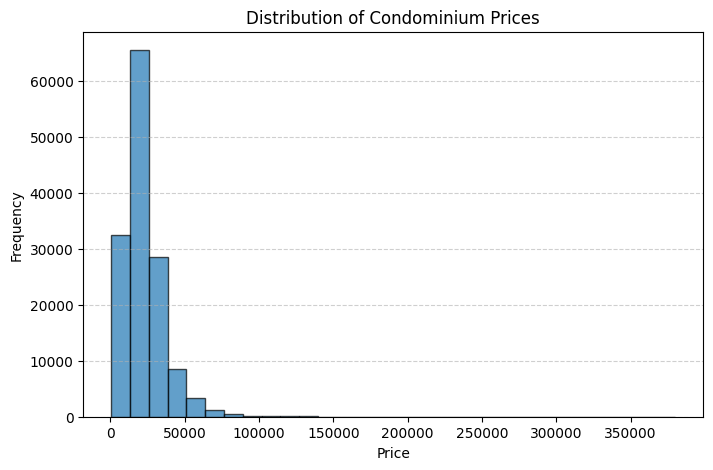

In [6]:
# Plot a histogram for the 'Condominium price' column
plt.figure(figsize=(8, 5))
combined_df['Condominium price'].plot(kind='hist', bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Condominium Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

**Explanation**

---

This histogram shows the distribution of condominium prices in the dataset. The x-axis represents the price range of the condominiums, and the y-axis shows how many condominiums fall within each price range (frequency).  

*   Most prices are concentrated at the lower end, suggesting that most condominiums are moderately priced.

*   The right-skewed nature of the distribution suggests that there might be some outliers, i.e., very high-priced condominiums that are significantly different from the typical price range. These outliers could be worth investigating further to see if there are any unique features or characteristics of these properties that cause this significant price difference. For example the few extremely high prices could likely represent luxury condominiums.

---

## b. A Histogram for Distribution of the 'Unit Size' Column


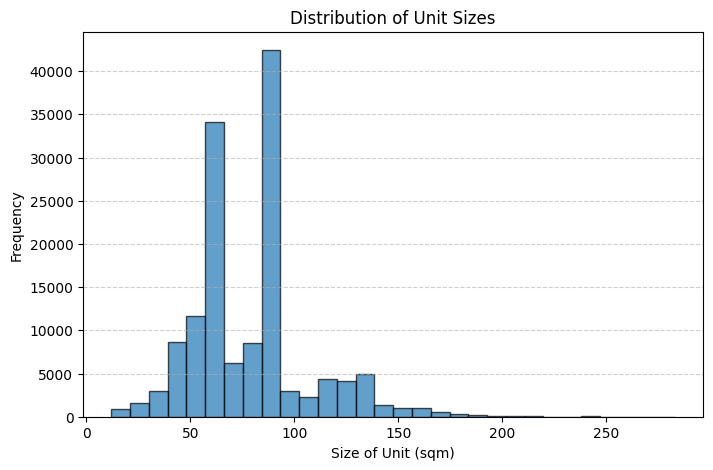

In [7]:
# Plot a histogram for the 'Unit Size' column
plt.figure(figsize=(8, 5))
combined_df['Size of unit'].plot(kind='hist', bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Unit Sizes')
plt.xlabel('Size of Unit (sqm)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

**Explanation**

---
This histogram shows the distribution of unit sizes. Here are some insights based on the plot:

* The distribution is right-skewed, meaning there are more units with smaller sizes compared to larger sizes. This is evident from the longer tail on the right side of the plot.
* There is a peak around the 100 sqm mark, indicating that this is the most common unit size.
* There are relatively few units below 25 sqm and above 200 sqm.
* The majority of units seem to be concentrated between 50 sqm and 150 sqm.

**Interpretation:**

* The high frequency of units around 100 sqm could suggest that this size is popular for certain types of units, such as apartments or small houses.
* The right-skewed nature of the distribution might indicate that there is a demand for smaller units, possibly due to affordability or lifestyle preferences.
* The scarcity of units below 25 sqm could be due to zoning restrictions or market demand.
* The scarcity of units above 200 sqm could be due to higher costs or limited availability of larger properties.

---

## c. A Histogram for Distribution of the 'Floor Number' Column

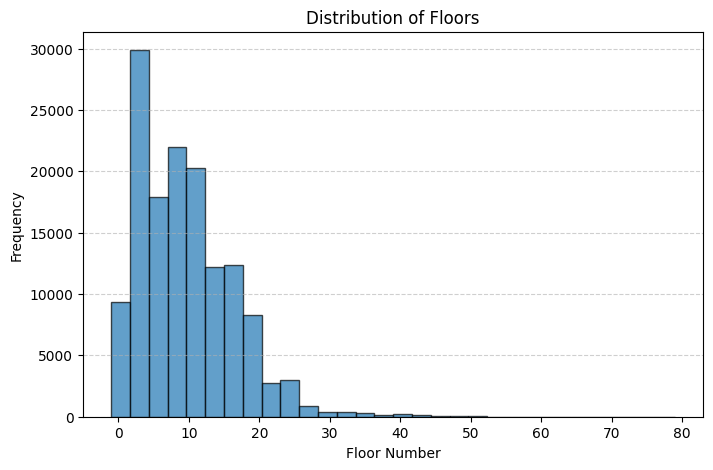

In [8]:
# Plot a histogram for the 'Floor Number' column
plt.figure(figsize=(8, 5))
combined_df['Floor'].plot(kind='hist', bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Floors')
plt.xlabel('Floor Number')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

**Explanation**

---
The histogram shows the distribution of floors.

* **Skewness**: The distribution is right-skewed. This means that the majority of the data points are concentrated towards the lower end of the floor number range, with a smaller number of higher-floor buildings.

* **Peak Frequency:** The highest frequency of buildings seems to be around the 5-10 floor range. This suggests that a significant portion of the buildings in the dataset are relatively low-rise structures.

* **Long Tail:** The plot exhibits a long tail towards the higher floor numbers. This indicates that there are some buildings with a much larger number of floors, but these are relatively rare compared to the more common low-rise buildings.

* **Building Regulations and Land Use:** The concentration of buildings in the lower floor range could be influenced by factors such as building regulations, zoning laws, and land use patterns. These regulations might limit the height of buildings in certain areas or incentivize low-rise developments.

* **Economic Factors:** Construction costs and market demand for higher-floor buildings can also play a role. It might be more economical to build lower-rise buildings in certain areas, or there might be less demand for high-rise structures in the regions represented by the data.

---

## d. A Histogram for the Distribution of Condominiums by Region

Combined dataframe shape: (140613, 31)


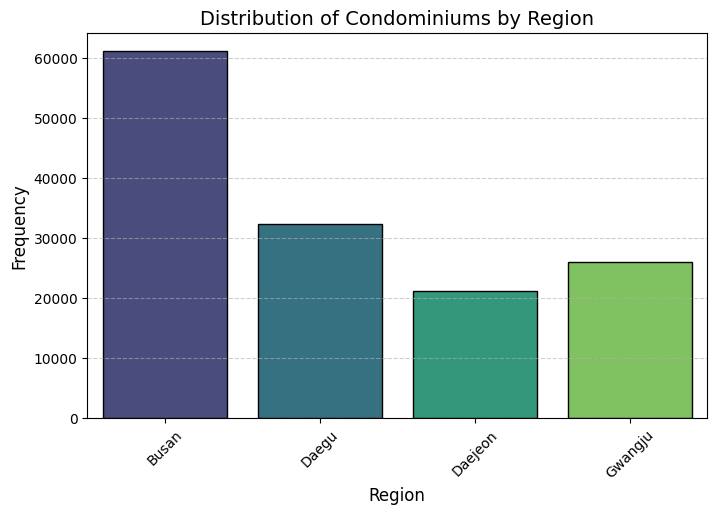

In [9]:
# Add region information to each dataframe before combining
region_names = ['Busan', 'Daegu', 'Daejeon', 'Gwangju']
region_dfs = []

# Loop through the dataframes, add region information, and append to region_dfs
for i, df in enumerate(dfs):
    df['Region'] = region_names[i]  # Add the corresponding region to the dataframe
    region_dfs.append(df)

# Concatenate all dataframes into one
combined_df = pd.concat(region_dfs, ignore_index=True)
print("Combined dataframe shape:", combined_df.shape)

# Plot a histogram for the distribution of condominiums by region
plt.figure(figsize=(8, 5))
sns.countplot(data=combined_df, x='Region', palette='viridis', edgecolor='black', hue='Region', legend=False)

plt.title('Distribution of Condominiums by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


Explanation:

---

**Overall Distribution:**

* The distribution of condominiums is uneven across the four regions.
* Busan has the highest number of condominiums, followed by Daegu, Gwangju, and Daejeon.

**Regional Comparisons:**

* **Busan:** Has the highest number of condominiums, about twice as many as Daegu.
* **Daegu:** Has the second-highest number of condominiums.
* **Gwangju and Daejeon:** Have significantly fewer condominiums compared to Busan and Daegu.

**Possible Factors:**

Several factors could contribute to this distribution:

* **Population Density:** Regions with higher population density may have a greater demand for condominiums, which could explain Busan's high number.
* **Economic Development:** Regions with strong economic growth may attract more residents and businesses, leading to an increased demand for housing, including condominiums.
* **Urbanization:** The level of urbanization in each region can also influence the demand for condominiums. More urbanized areas may have a higher concentration of condominiums.
* **Government Policies:** Housing policies and regulations can impact the availability and affordability of condominiums in different regions.

---

**Question 2. Is there a relationship between two columns of your data that you didn't expect? How would you explain it?**


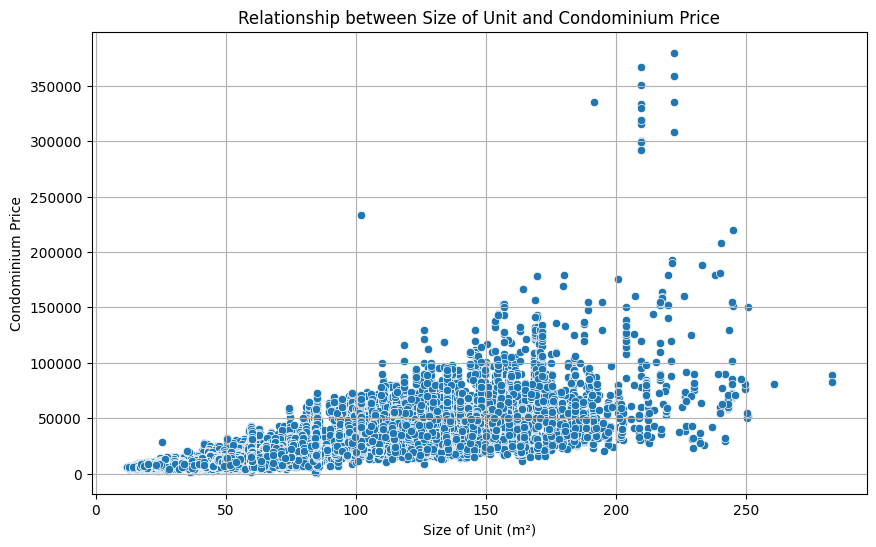

The correlation between 'Size of unit' and 'Condominium price' is: 0.7617197735077961


In [10]:
# Scatterplot of 'Size of unit' and 'Condominium price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size of unit', y='Condominium price', data=combined_df)
plt.title('Relationship between Size of Unit and Condominium Price')
plt.xlabel('Size of Unit (m²)')
plt.ylabel('Condominium Price')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient
correlation = combined_df['Size of unit'].corr(combined_df['Condominium price'])
print(f"The correlation between 'Size of unit' and 'Condominium price' is: {correlation}")

---

The correlation coefficient of **0.76** between *Size of unit* and *Condominium price* indicates a **strong positive relationship**.

### What does this mean?  
- **Strong Positive Correlation:**  
  A correlation of 0.76 suggests that as the size of a condominium unit increases, its price also tends to increase significantly. The larger the unit, the higher the price.

### Why is this expected?  
- **Direct Relationship:**  
  Larger units usually have higher prices because they offer more living space, which is a primary factor in determining real estate value. Buyers often associate larger spaces with better comfort and utility.
  
- **Market Trends:**  
  In most real estate markets, the price per square meter tends to be consistent within a given area. Thus, larger units generally command higher total prices.

---

**Question 3: Consider who would be interested in your dataset. Identify at least three organizations or individuals that would be interested in your insights. Why?**

---
**a. Real Estate Developers**:
   - They would use insights from the data to identify ideal locations for new condominium projects, especially areas with high demand and optimal pricing factors.

**b. Urban Planners**:
   - Insights on distances to subway stations, greenspaces, and waterfronts can guide infrastructure development to create more accessible and livable neighborhoods.

**c. Real Estate Investors**:
   - They would be interested in identifying undervalued properties with high potential for appreciation based on factors such as population density and proximity to key amenities.

**d. Potential Home Buyers**:  
- They could use the data to compare prices across different areas and make informed decisions about where to buy a condo.  The data could help them understand the relationship between price and various features.

**e. Government Agencies**:  
- Data on housing prices and related factors could inform housing policy decisions, urban planning initiatives, and economic development strategies.

**f. Market Researchers**:
- Researchers studying real estate trends, consumer behavior, or urban economics would find this dataset valuable.

---